# Graficos de datos de Pautas Publicitarias

In [6]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from geopy.geocoders import Nominatim
import time



In [7]:
pp = pd.read_csv('C:\\Users\\jvazquez1\\Desktop\\Ingenias_proyecto2\\Ingenias_proyecto\\datos\\pautas_publicitarias_limpio.csv', low_memory=False)

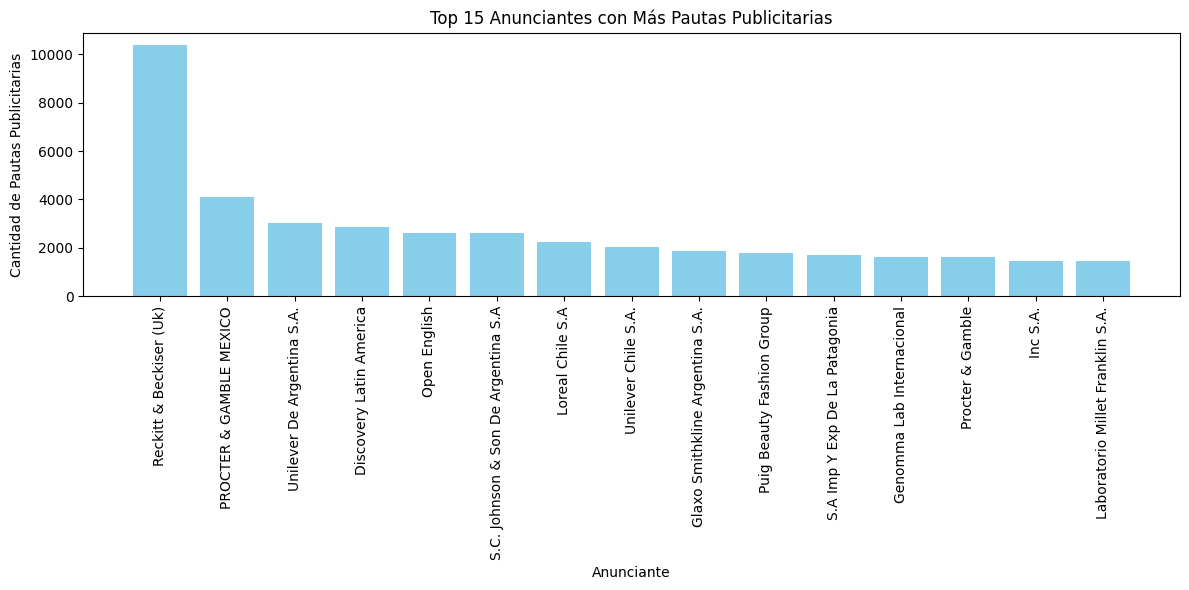

In [5]:
# Obtener los 15 anunciantes con más pautas publicitarias
top_15_anunciantes = pp['Advertiser'].value_counts().head(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.bar(top_15_anunciantes.index, top_15_anunciantes.values, color='skyblue')
plt.xlabel('Anunciante')
plt.ylabel('Cantidad de Pautas Publicitarias')
plt.title('Top 15 Anunciantes con Más Pautas Publicitarias')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.show()


C:\Users\jvazquez1\AppData\Local\Temp\3\ipykernel_5396\623970051.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


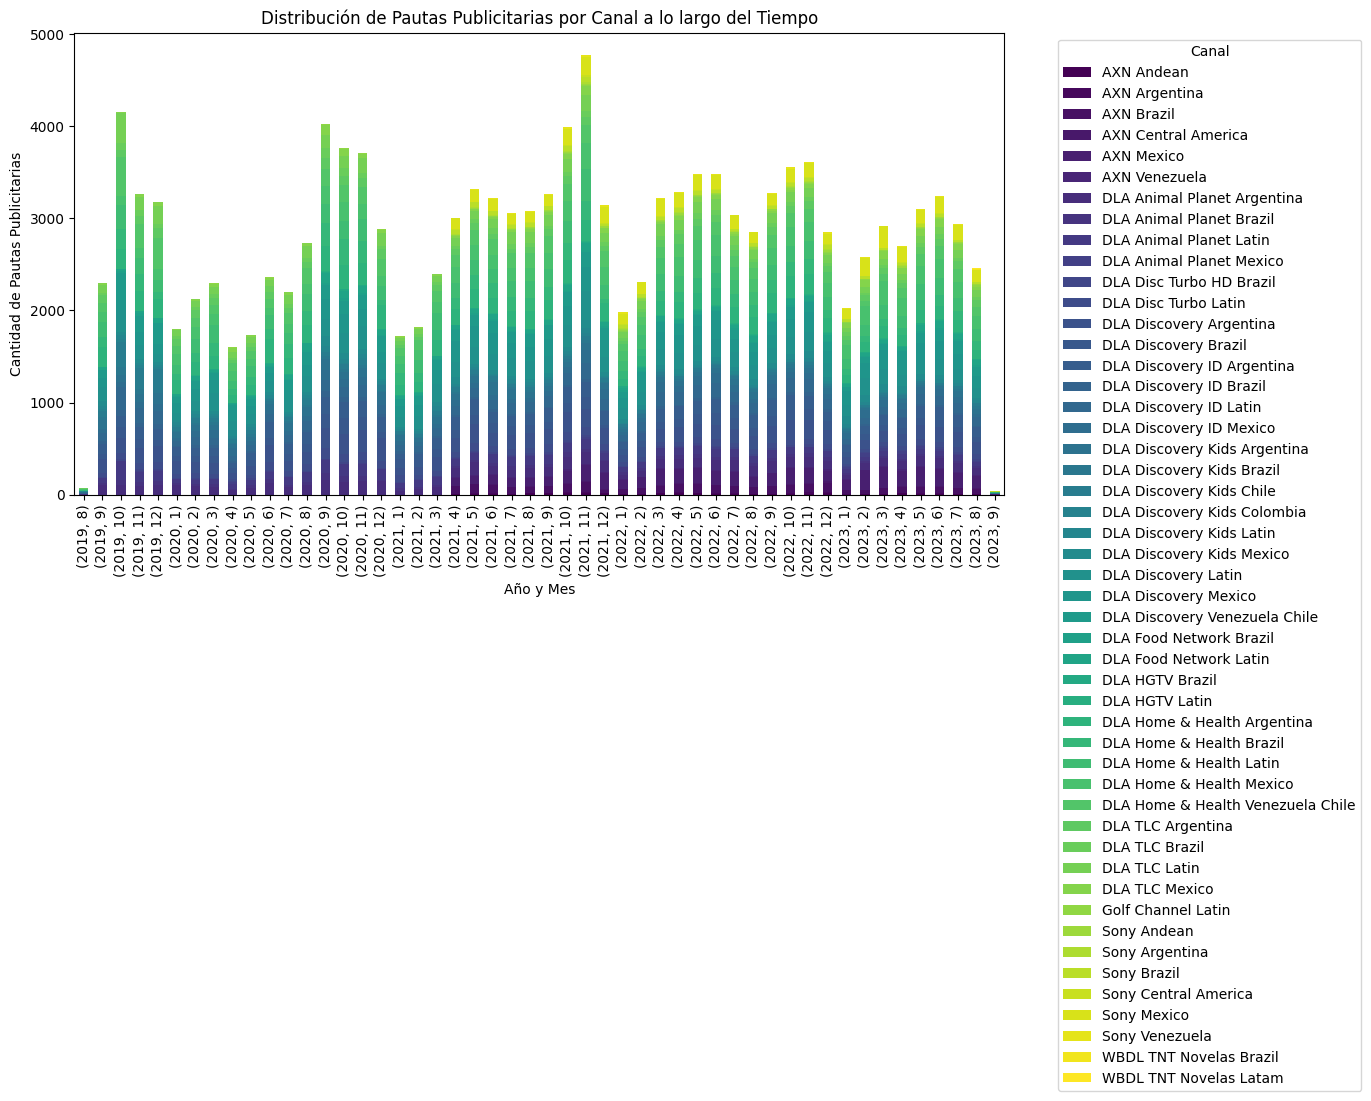

In [6]:
# Agrupar los datos por año, mes y canal, y contar la cantidad de pautas publicitarias en cada grupo
agrupado = pp.groupby(['Year', 'Month', 'Channel'])['Row type'].count().unstack()

# Crear el gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad de Pautas Publicitarias')
plt.title('Distribución de Pautas Publicitarias por Canal a lo largo del Tiempo')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

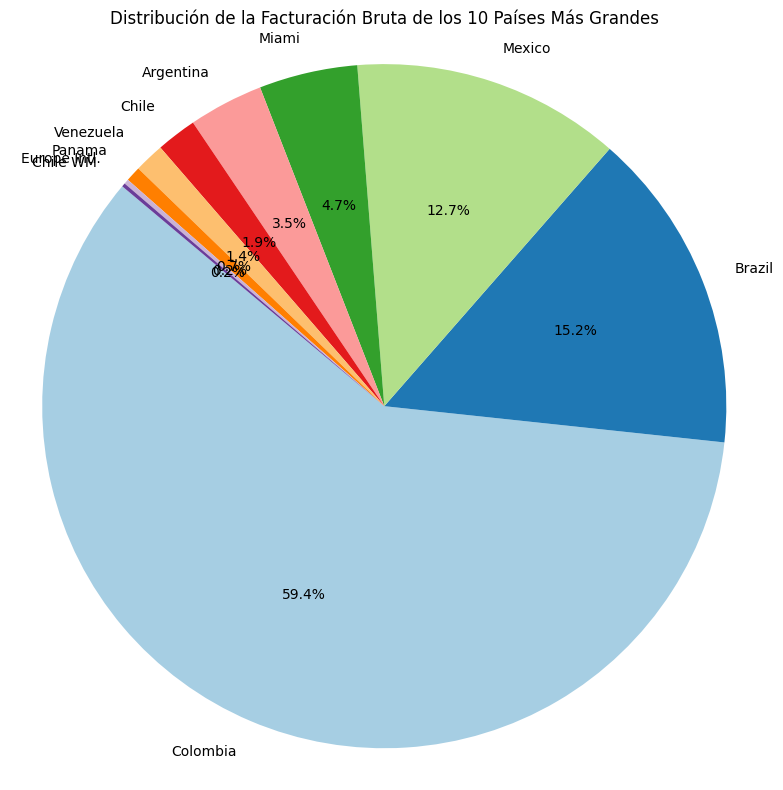

In [23]:
# Obtener los países únicos en la columna "Sales holding company"
paises = pp['Sales holding company'].unique()

# Calcular la facturación bruta total para cada país
facturacion_por_pais = pp.groupby('Sales holding company')['Invoice amount gross home currency'].sum()

# Seleccionar los N países con la facturación bruta más alta (por ejemplo, los 10 primeros)
top_n_paises = facturacion_por_pais.nlargest(10)

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(top_n_paises.values, labels=top_n_paises.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Para que el gráfico de torta sea circular
plt.title('Distribución de la Facturación Bruta de los 10 Países Más Grandes')
plt.tight_layout()
plt.show()



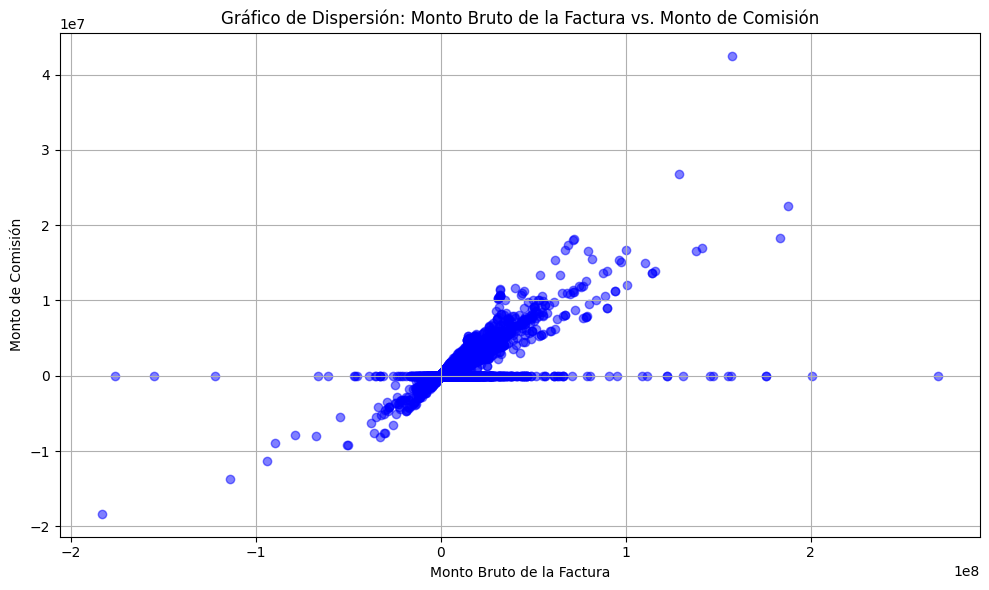

In [30]:
# Obtener los datos de las dos variables
monto_bruto_factura = pp['Invoice amount gross']
monto_comision = pp['Commission amount']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(monto_bruto_factura, monto_comision, alpha=0.5, color='blue')
plt.xlabel('Monto Bruto de la Factura')
plt.ylabel('Monto de Comisión')
plt.title('Gráfico de Dispersión: Monto Bruto de la Factura vs. Monto de Comisión')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.tight_layout()
plt.show()



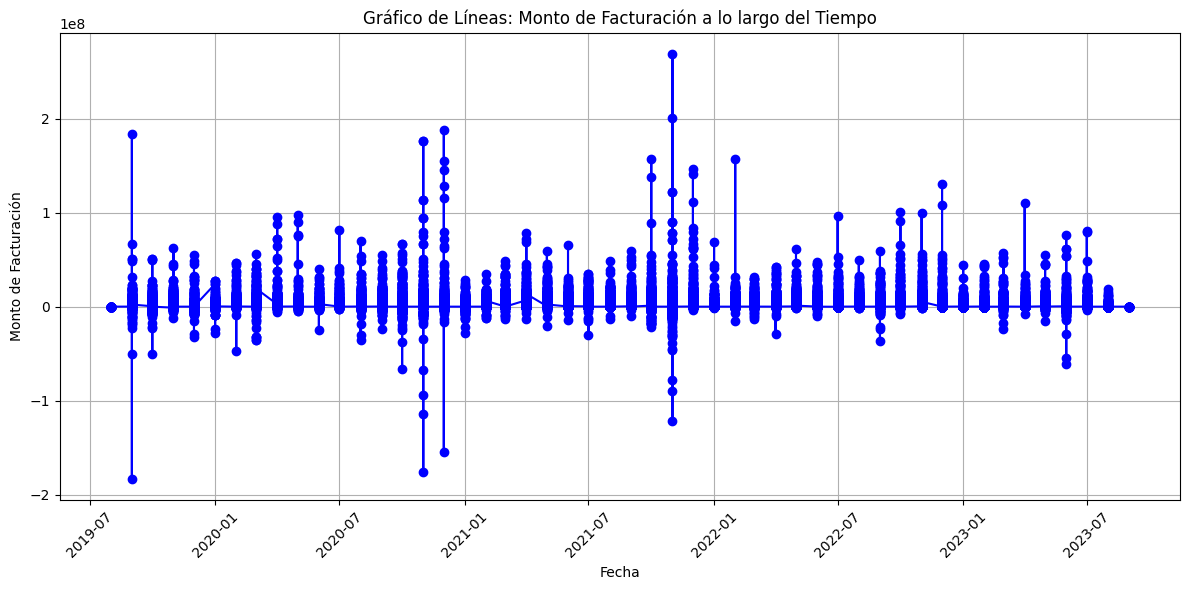

In [31]:
# Crear una columna de fecha combinando las columnas 'Year' y 'Month'
pp['Fecha'] = pp['Year'].astype(str) + '-' + pp['Month'].astype(str)

# Convertir la columna 'Fecha' en tipo datetime
pp['Fecha'] = pd.to_datetime(pp['Fecha'], format='%Y-%m')

# Ordenar el DataFrame por la columna de fecha
pp = pp.sort_values(by='Fecha')

# Obtener los datos de la serie temporal
fechas = pp['Fecha']
facturacion = pp['Invoice amount gross']

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.plot(fechas, facturacion, marker='o', linestyle='-', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Monto de Facturación')
plt.title('Gráfico de Líneas: Monto de Facturación a lo largo del Tiempo')
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()
plt.show()


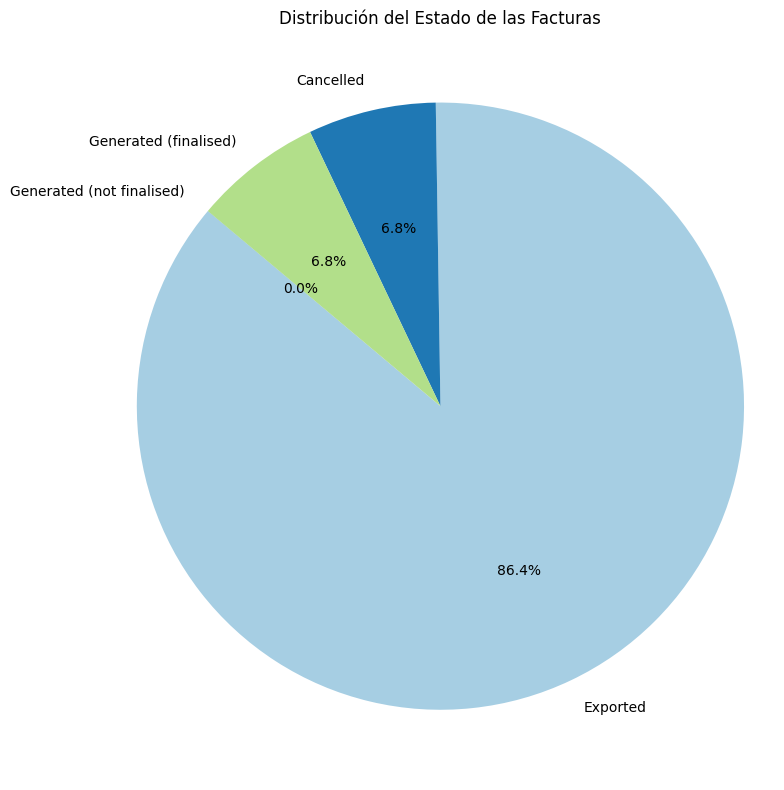

In [33]:
# Obtener la distribución de los estados de factura
distribucion_estados = pp['Invoice Status'].value_counts()

# Crear un gráfico de tarta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(distribucion_estados, labels=distribucion_estados.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Para que el gráfico de tarta sea circular
plt.title('Distribución del Estado de las Facturas')
plt.tight_layout()
plt.show()

c:\Users\jvazquez1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvazquez1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvazquez1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jvazquez1\AppData\Local\Temp\3\ipykernel_5396\37203210.py:8: UserWarning: Tight layout not applied. The bottom and top ma

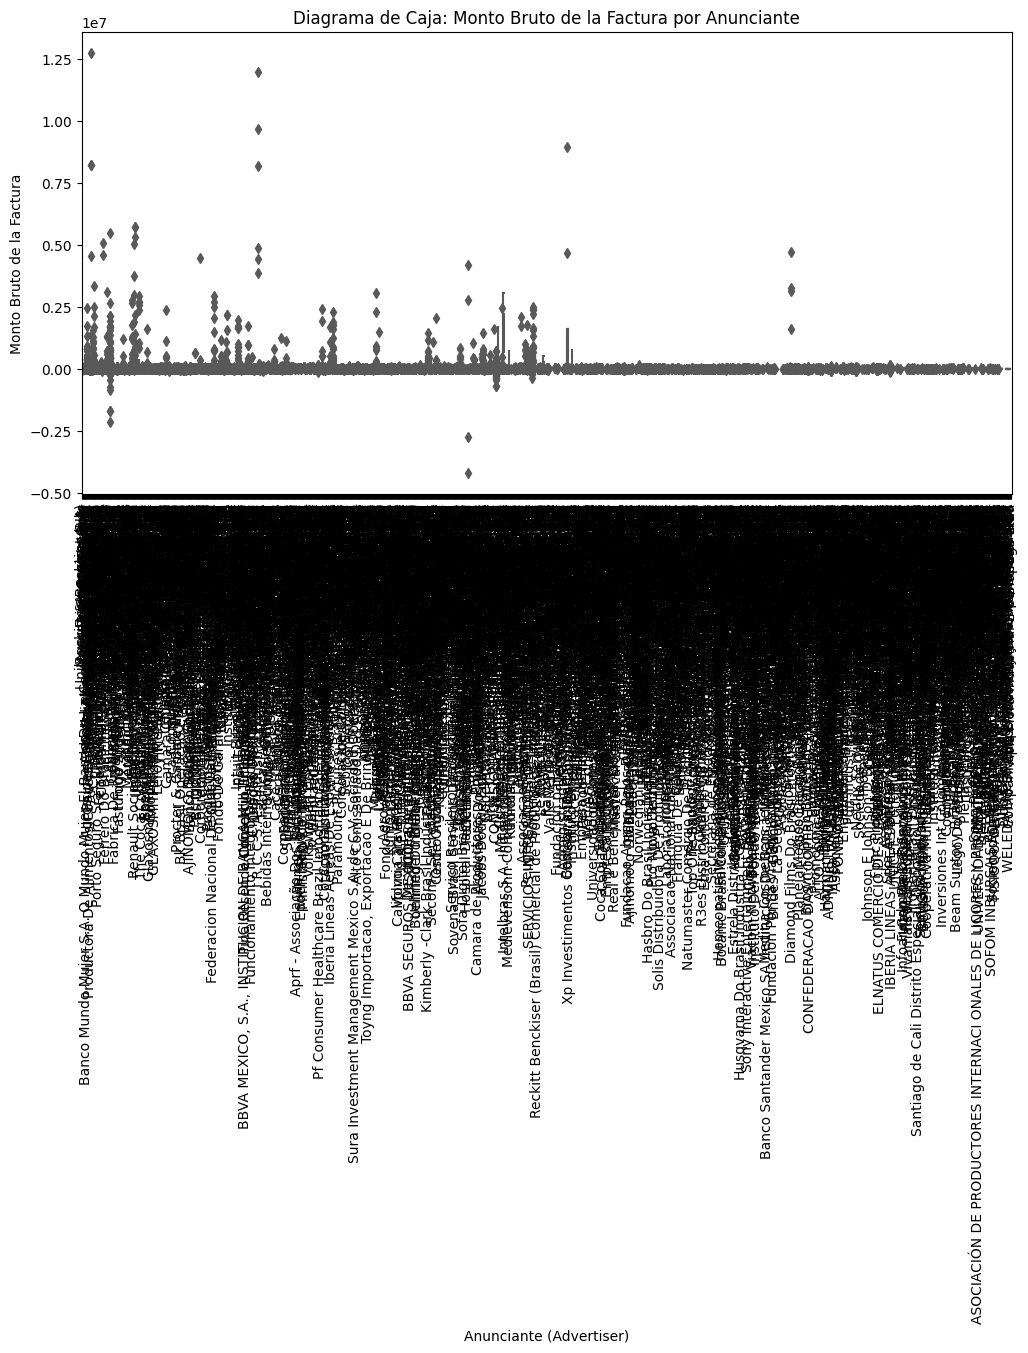

In [35]:
# Crear un diagrama de caja
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
sns.boxplot(x='Advertiser', y='Invoice amount gross home currency', data=pp, palette='Set2')
plt.xlabel('Anunciante (Advertiser)')
plt.ylabel('Monto Bruto de la Factura')
plt.title('Diagrama de Caja: Monto Bruto de la Factura por Anunciante')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()
plt.show()

c:\Users\jvazquez1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvazquez1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jvazquez1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


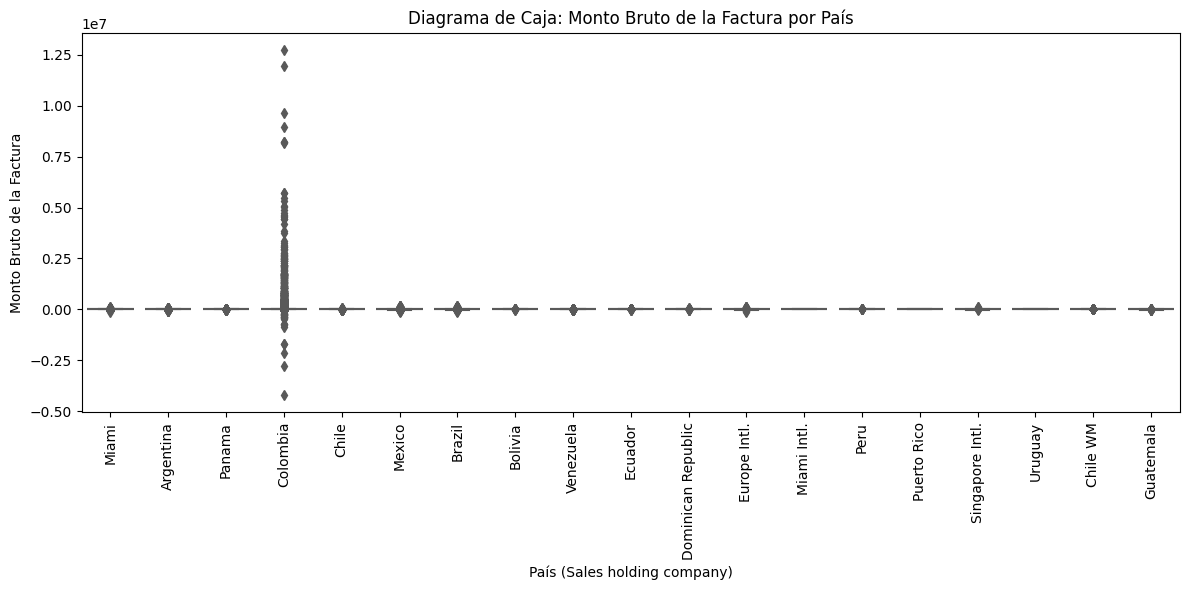

In [36]:
# Crear un diagrama de caja
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
sns.boxplot(x='Sales holding company', y='Invoice amount gross home currency', data=pp, palette='Set2')
plt.xlabel('País (Sales holding company)')
plt.ylabel('Monto Bruto de la Factura')
plt.title('Diagrama de Caja: Monto Bruto de la Factura por País')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()
plt.show()


In [9]:
# Diccionario de coordenadas de países
coordenadas_paises = {
    'Argentina': (-34.6118, -58.4173),
    'Mexico': (19.4326, -99.1332),
    'Brazil': (-23.5505, -46.6333),
    'Colombia': (4.6097, -74.0817),
    'Chile': (-33.4489, -70.6693),
    'Miami': (25.7617, -80.1918),
    'Panama': (8.9824, -79.5199),
    'Venezuela': (10.4806, -66.9036),
    'Bolivia': (-16.5000, -68.1500),
    'Europe Intl.': (48.8566, 2.3522),
    'Dominican Republic': (18.4861, -69.9312),
    'Ecuador': (-0.2295, -78.5243),
    'Miami Intl.': (25.7617, -80.1918),
    'Peru': (-12.0464, -77.0428),
    'Puerto Rico': (18.4655, -66.1057),
    'Singapore Intl.': (1.3521, 103.8198),
    'Uruguay': (-34.9011, -56.1915),
    'Chile WM': (-33.4489, -70.6693),
    'Guatemala': (14.6349, -90.5069)
}

# Agregar las coordenadas al DataFrame pp
pp['Coordinates'] = pp['Sales holding company'].map(coordenadas_paises)
pp[['Latitude', 'Longitude']] = pd.DataFrame(pp['Coordinates'].tolist())

# Mostrar el DataFrame con las coordenadas
print(pp)


   Sales holding company           Coordinates  Latitude  Longitude
0              Argentina  (-34.6118, -58.4173)  -34.6118   -58.4173
1                 Mexico   (19.4326, -99.1332)   19.4326   -99.1332
2                 Brazil  (-23.5505, -46.6333)  -23.5505   -46.6333
3               Colombia    (4.6097, -74.0817)    4.6097   -74.0817
4                  Chile  (-33.4489, -70.6693)  -33.4489   -70.6693
5                  Miami   (25.7617, -80.1918)   25.7617   -80.1918
6                 Panama    (8.9824, -79.5199)    8.9824   -79.5199
7              Venezuela   (10.4806, -66.9036)   10.4806   -66.9036
8                Bolivia       (-16.5, -68.15)  -16.5000   -68.1500
9           Europe Intl.     (48.8566, 2.3522)   48.8566     2.3522
10    Dominican Republic   (18.4861, -69.9312)   18.4861   -69.9312
11               Ecuador   (-0.2295, -78.5243)   -0.2295   -78.5243
12           Miami Intl.   (25.7617, -80.1918)   25.7617   -80.1918
13                  Peru  (-12.0464, -77.0428)  

In [12]:
import folium

# Crear un mapa centrado en una ubicación inicial (por ejemplo, latitud y longitud)
mapa = folium.Map(location=[-34.6118, -58.4173], zoom_start=5)

# Iterar a través de los datos de los anunciantes y agregar marcadores al mapa
for index, row in pp.iterrows():
    lat = row['Latitude']  # Obtener la latitud del DataFrame
    lon = row['Longitude']  # Obtener la longitud del DataFrame

    # Verificar si hay coordenadas disponibles
    if not pd.isna(lat) and not pd.isna(lon):
        folium.Marker(
            location=[lat, lon],  # Coordenadas geográficas del anunciante
            popup=row['Sales holding company'],  # Nombre del anunciante como texto emergente
        ).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('mapa_publicidad.html')

# Mostrar el mapa en el Jupyter Notebook
mapa
